# Medical NER using spaCy

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacy.tokens import DocBin
from spacy.util import filter_spans
from tqdm import tqdm
import json5


def load_data(data_path):
    """
    This function will load
    the json file
    """
    with open(data_path,'r',encoding='utf-8') as f:
        data = json5.load(f)
    return data
    f.close()
    
def get_unique_tag_entities(data):
    """
    This function will get the
    unique tag names or entities
    that we want to highlight
    """
    tag_names = set()
    for example in data['examples']:
        annotations = example['annotations']
        for dict_item in annotations:
            if  dict_item['tag_name'] not in tag_names:
                tag_names.add(dict_item['tag_name'])
    return tag_names

def create_data_for_spacy(data):
    """
    This function converts the list
    data into format for spacy binary
    conversion
    """
    final_data  =[]
    for example in data['examples']:
        temp_dict = {}
        temp_dict['text'] = example['content']
        temp_dict['entities'] = []
        annotations = example['annotations']
        for dict_item in annotations:
            label = dict_item['tag_name']
            start = dict_item['start']
            end = dict_item['end']
            temp_dict['entities'].append((start,end,label))
        final_data.append(temp_dict)
    return final_data

def split_data_train_dev(data):
    train = data[:25]
    test = data[25:31]
    return train,test

def convert_to_spacy(data,output_path):
    """
    This function converts the
    data file to spacy binary files
    by creating a blank nlp model
    and DocBin object
    """
    nlp = spacy.blank("en")
    db = DocBin()
    for example in tqdm(data):
        text = example['text']
        labels = example['entities']
        # create a doc object from text
        doc = nlp.make_doc(text)
        ents = []
        for start,end,label in labels:
            span = doc.char_span(start,end,label=label,alignment_mode="contract")
            if span is None:
                print("Skipping entity")
            else:
                ents.append(span)
        filtered_ents = filter_spans(ents)
        doc.ents = filtered_ents
        db.add(doc)
    db.to_disk(output_path)
    
def main():
    data = load_data(r'/kaggle/input/medical-ner/Corona2.json')
    print("Number of records: ",len(data['examples']))
    print('\n---RAW DATA EXAMPLE---\n')
    print(data['examples'][0])
    tag_names = get_unique_tag_entities(data)
    print('\nUNIQUE TAG NAMES\n')
    print(tag_names)
    final_data = create_data_for_spacy(data)
    print('\n---FINAL DATA EXAMPLE---\n')
    print(final_data[0])
    train,test = split_data_train_dev(final_data)
    print('\n---CONVERTING DATA---\n')
    convert_to_spacy(train,'/kaggle/working/train.spacy')
    convert_to_spacy(test,'/kaggle/working/dev.spacy')
    
if __name__ == "__main__":
    main()

Number of records:  31

---RAW DATA EXAMPLE---

{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe', 'content': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]", '

100%|██████████| 25/25 [00:00<00:00, 237.15it/s]


Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


100%|██████████| 6/6 [00:00<00:00, 270.35it/s]


**The next steps for training were run in Anaconda terminal for faster processing and model was tested for NER in Jupyter Notebook.**

**Generating and running config file from spaCy**

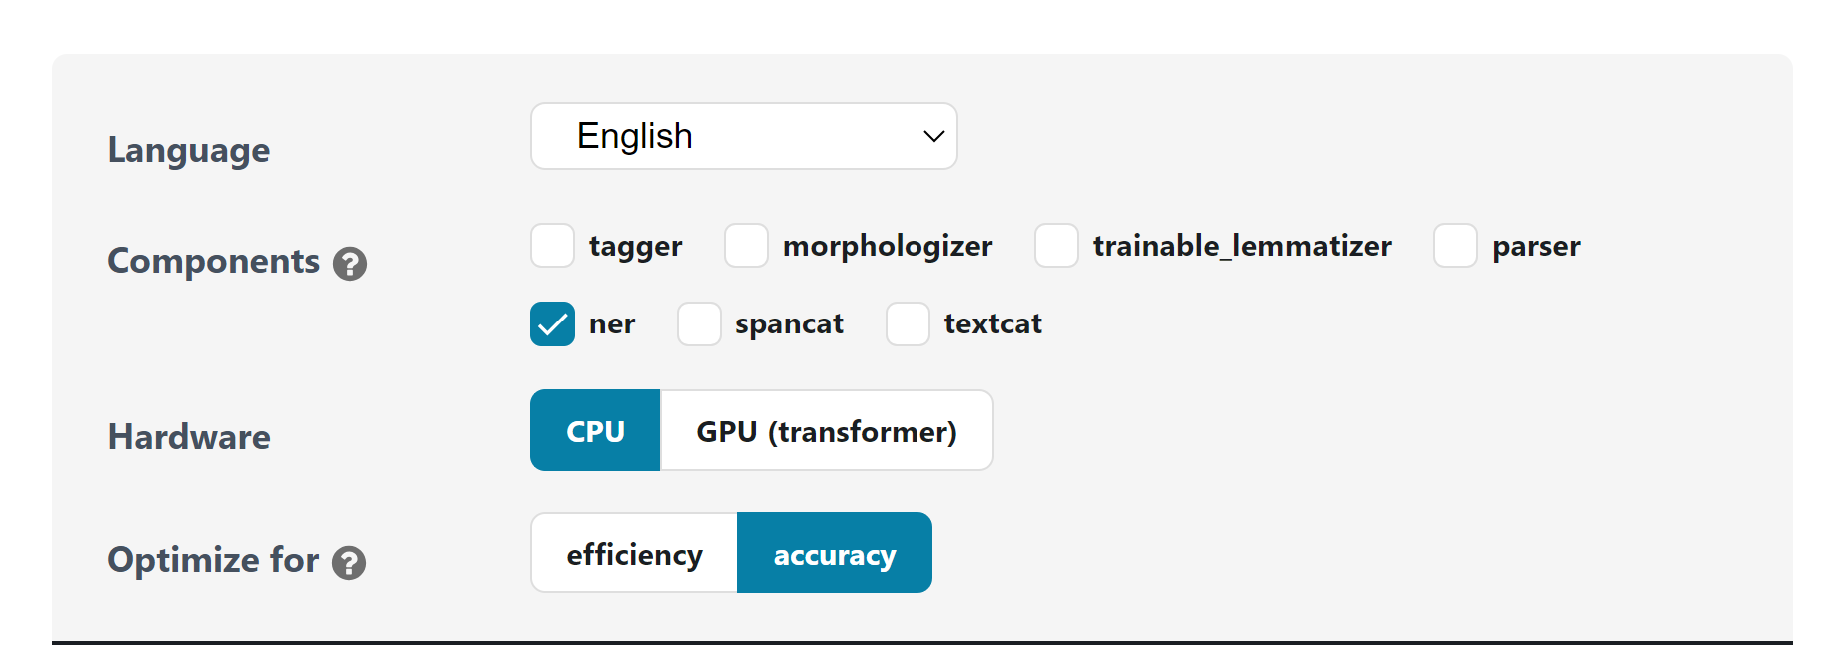

**python -m spacy init fill-config base_config.cfg config.cfg**

**python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./dev.spacy**

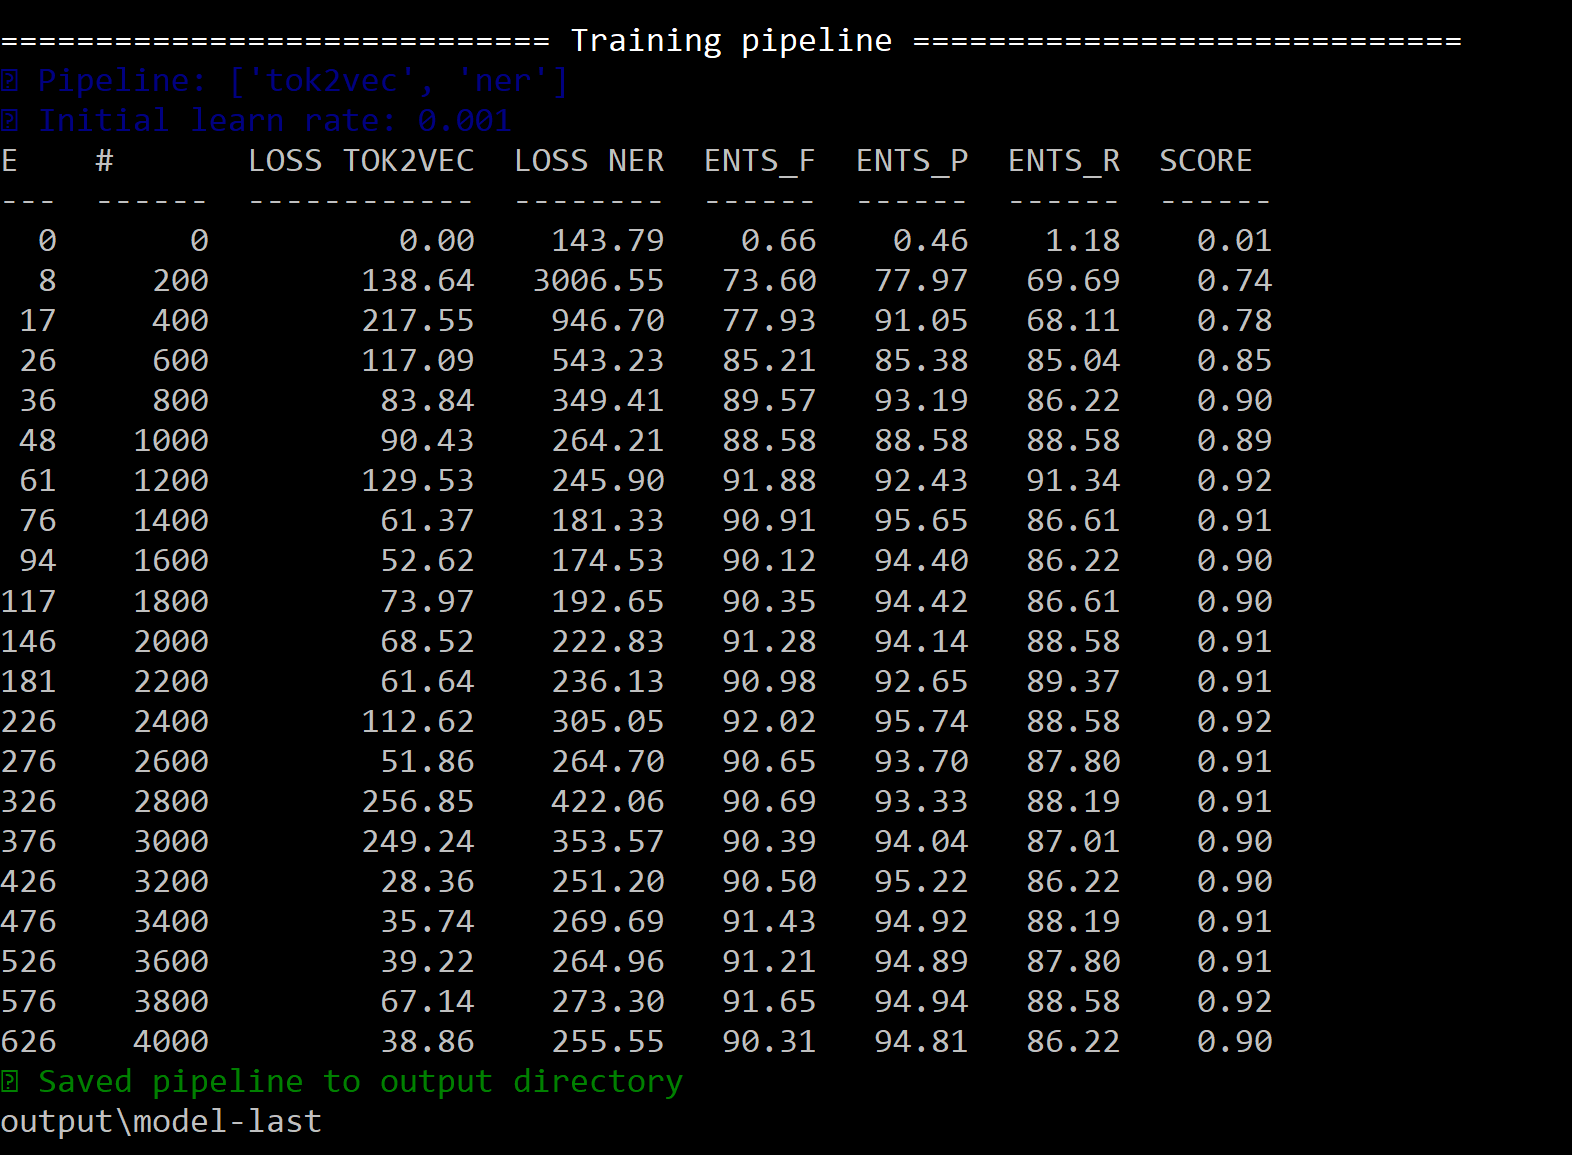

**Testing the best model on the test set**

nlp_ner = spacy.load("./output/model-best")

colors = {"PATHOGEN": "#F08080", "MEDICINE": "#EEE8AA", "MEDICALCONDITION":"#8FBC8B"}

options = {"colors": colors}

for example in test:
    
    doc = nlp_ner(example.get('text'))
    spacy.displacy.render(doc, style="ent", options= options, jupyter=True)

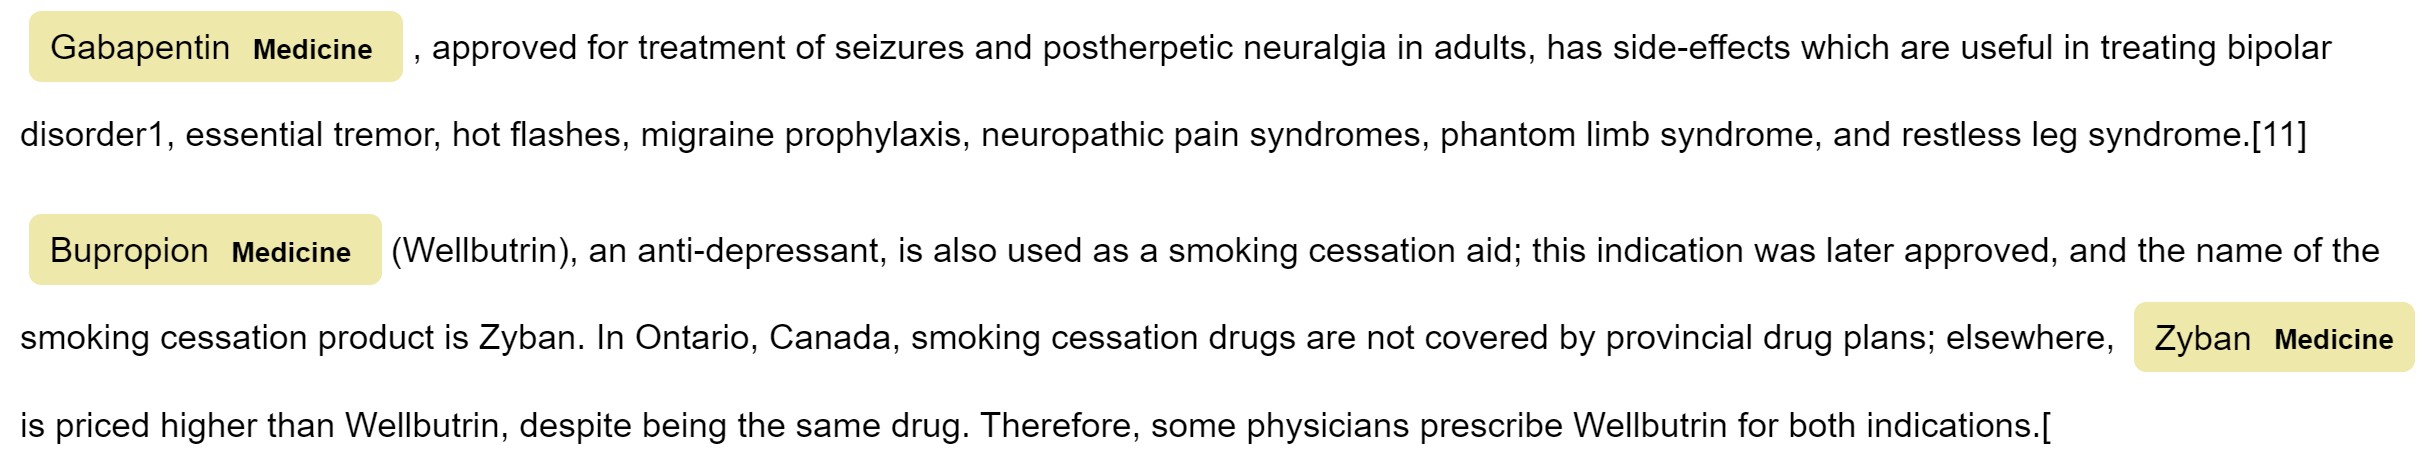

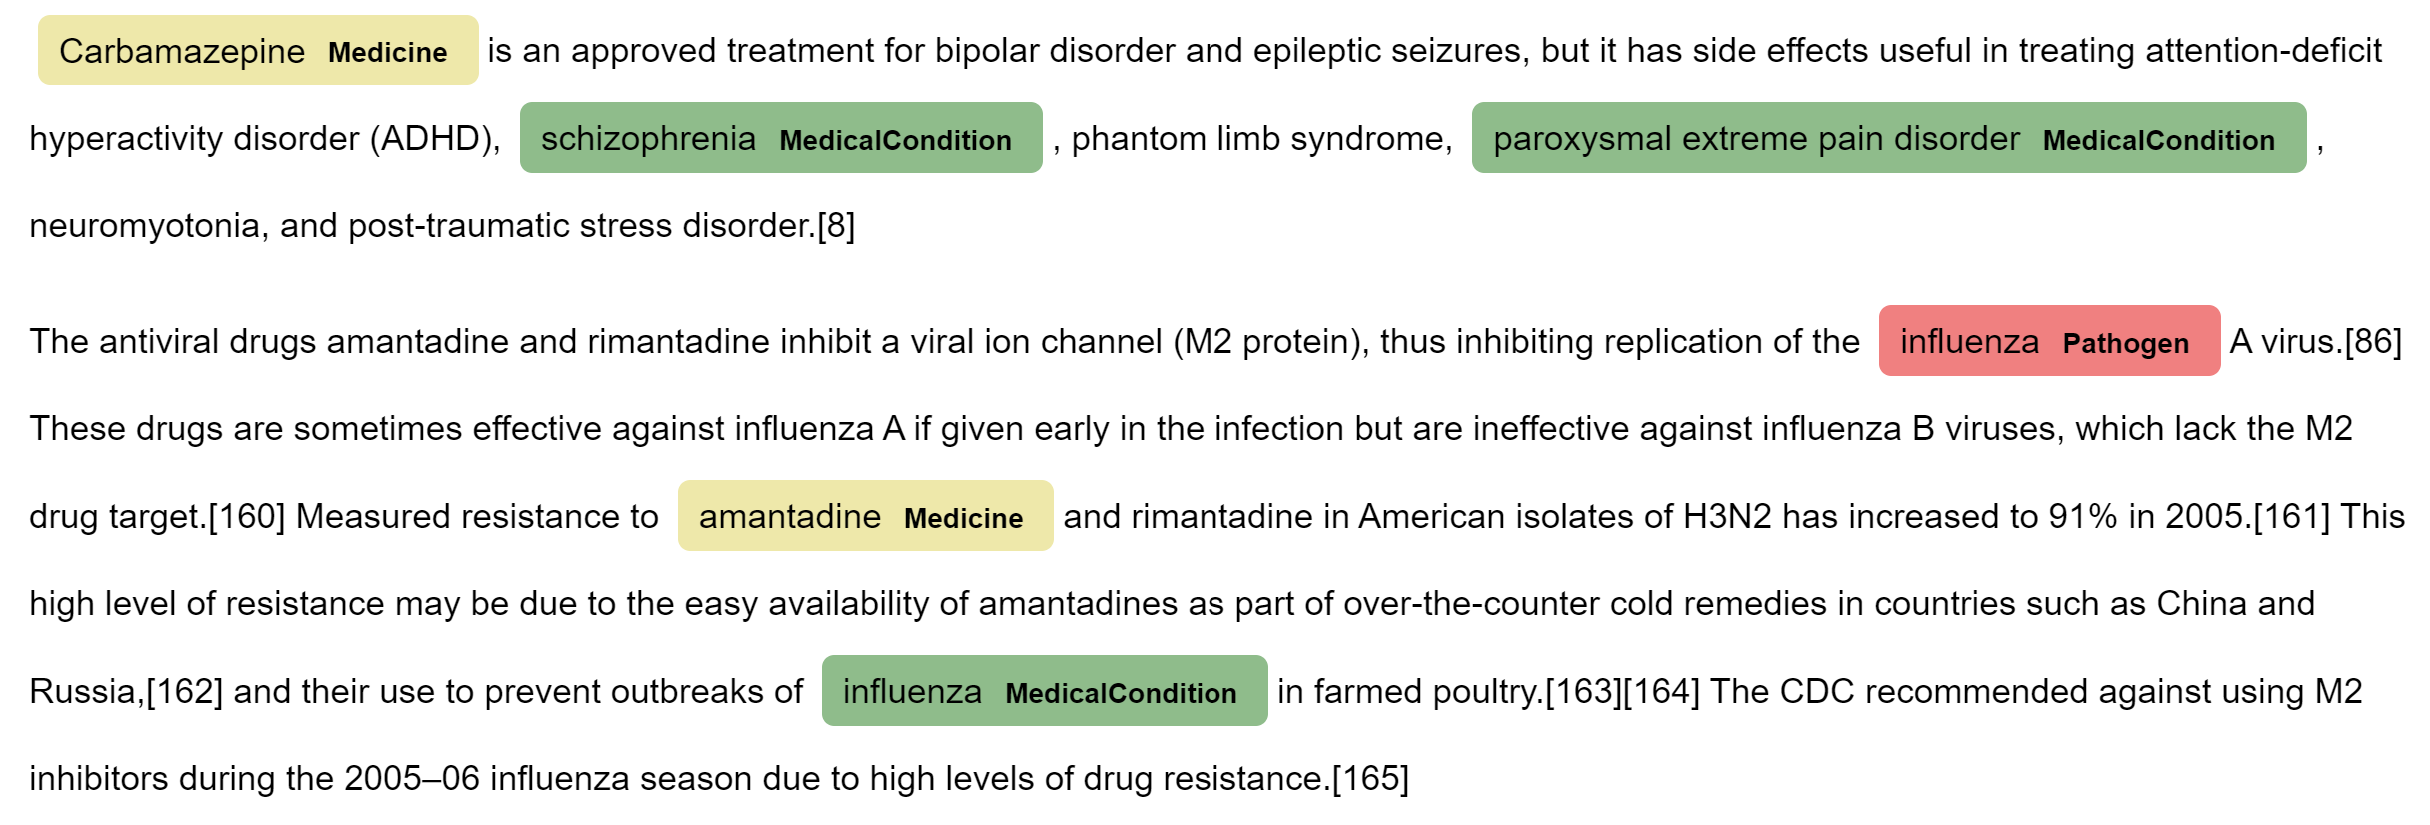

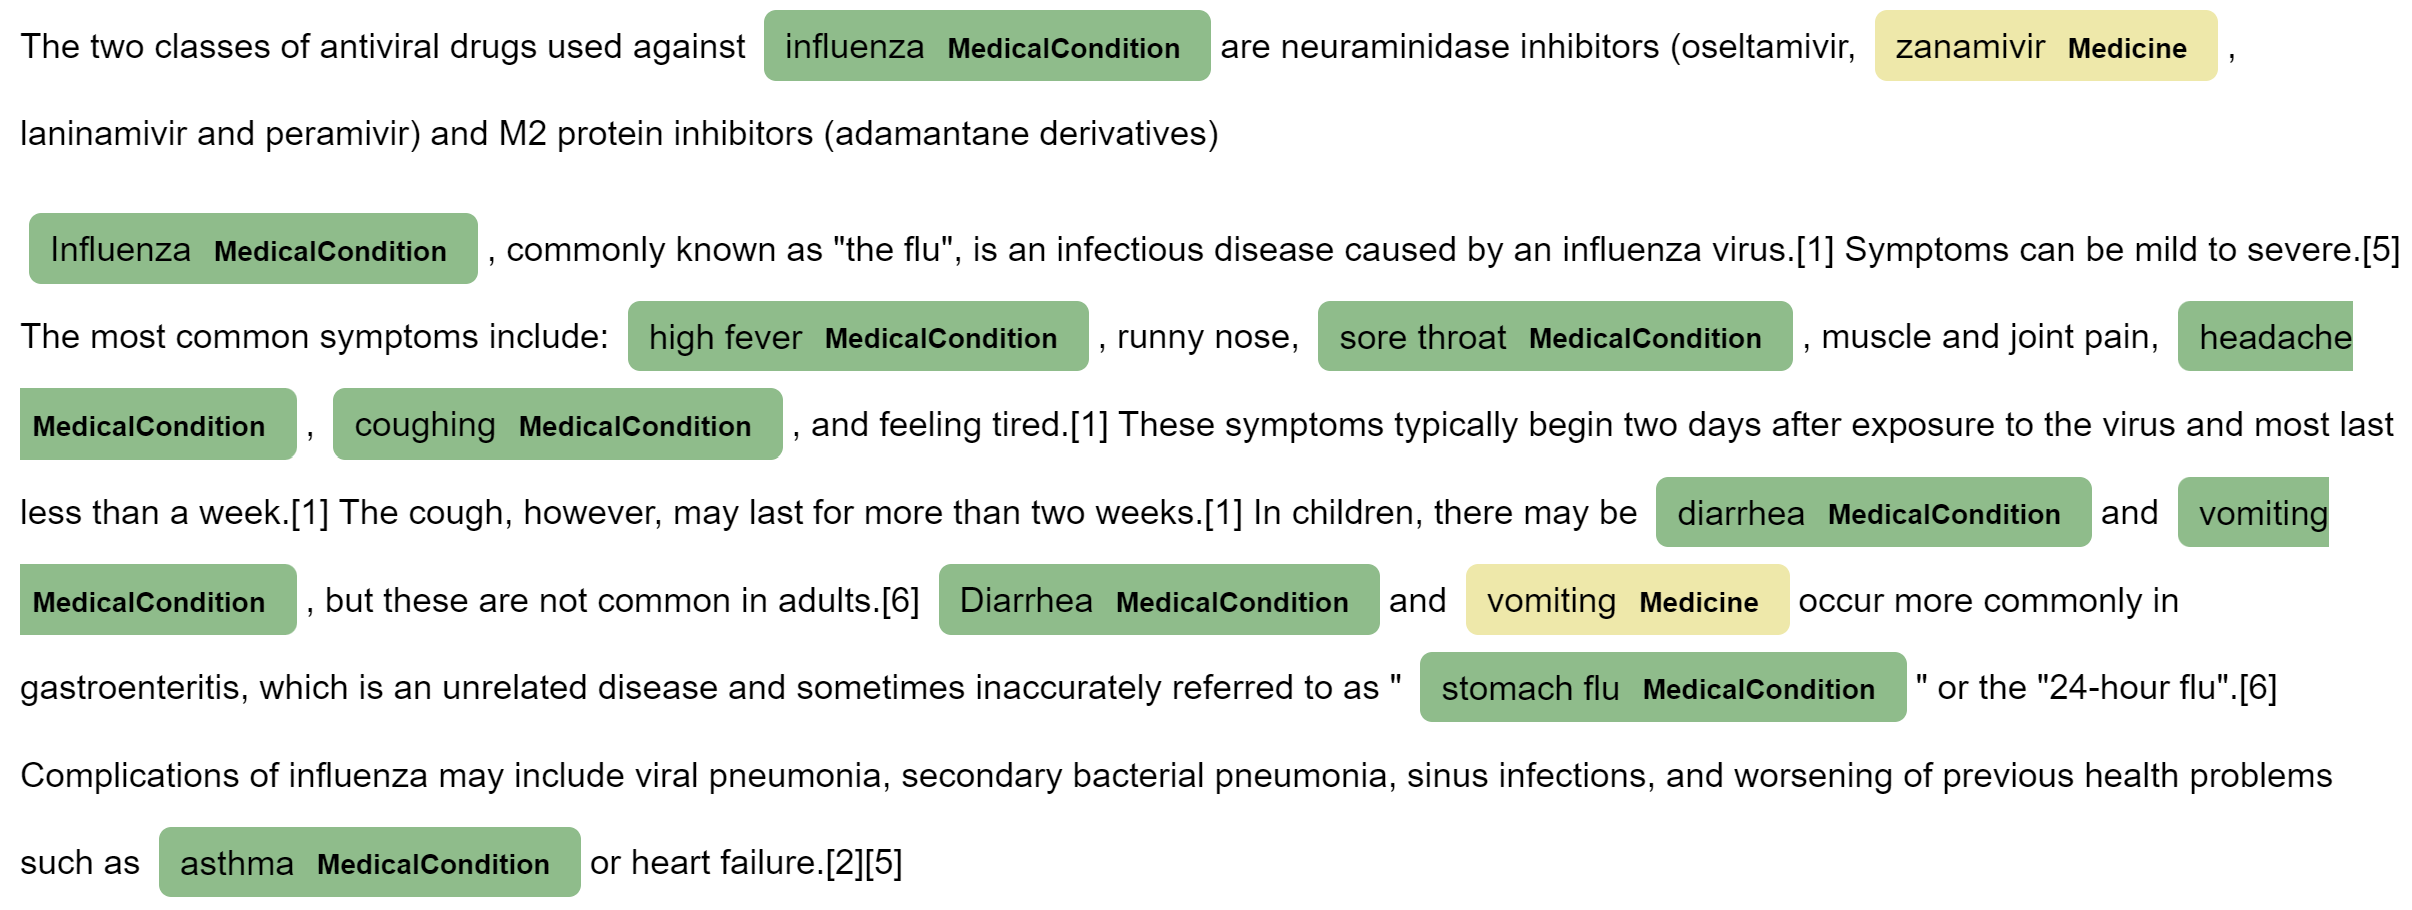